<a href="https://colab.research.google.com/github/PacTal/Doctoral-thesis/blob/main/Two_Level_Model/Two_Level_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Two-Level model


Normalization test= 0.999999
Normal-Monte-Carlo= 0.9999999999999999
Test statistic: 0.2258
P-value: 0.4135
The null hypothesis cannot be rejected at the 0.05 level of significance.


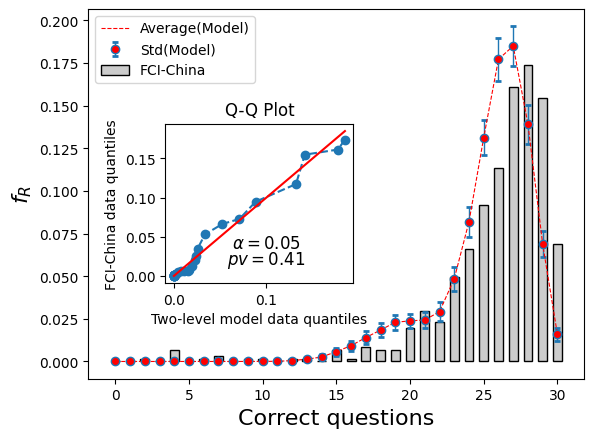

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from seaborn._core.properties import LineWidth
#----FCI data
distrubutionFCI=[0.001272264631, 0.006361323155, 0.02926208651, 0.05089058524,
                 0.08651399491, 0.1323155216, 0.1641221374, 0.1374045802, 0.1183206107,
                 0.08905852417, 0.06361323155, 0.03562340967, 0.02417302799, 0.02926208651,
                 0.02162849873, 0.005089058524, 0.002544529262, 0.001272264631, 0.001272264631,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#---------Tug-K
distrubutionTugK=[0.0,0.006993006993, 0.02797202797, 0.04895104895, 0.07692307692, 0.1188811189,
                  0.1328671329, 0.1258741259, 0.1048951049, 0.08391608392, 0.06293706294,
                  0.04895104895, 0.02797202797, 0.04195804196, 0.02797202797, 0.02097902098,
                  0.006993006993, 0.006993006993, 0.006993006993, 0, 0.006993006993,
                  0.006993006993, 0, 0.006993006993]
#----------- FCI china
distrubutionFCI_china=[0.000000,0.000000, 0.001642, 0.000000, 0.006568, 0.000000, 0.001642,
                       0.003284, 0.000000, 0.001642, 0.001642, 0.000000, 0.001642,
                       0.001642, 0.000000, 0.006568, 0.001642, 0.008210, 0.006568,
                       0.006568, 0.019704, 0.029557, 0.022989, 0.049261, 0.065681,
                       0.091954, 0.113300, 0.160920, 0.174056, 0.154351, 0.068966]
#-------------
#print("Normalization test=",np.sum(distrubutionTugK))
print("Normalization test=",np.sum(distrubutionFCI_china))
#----
def Count_essays(A,n): #A is the number student, n number of questions
  acum=[0 for i in range(n+1)]
  for k in range(n+1):
    for j in A:
      if k==j:
        acum[k]=acum[k]+1
  return acum
#---Parameters for the FCI
#n,p,q=30,0.2,0.41 # n is the number of correct correct questions,p is pl, q is ph
#N1,N2,U=470,530,100  #N1 is Nl, N2 is Nh and U is the university virtual number
#----------------
#---Parameters for the Tug-K
#n,p,q=23,0.23,0.4 # n is the number of correct correct questions,p is pl, q is ph
#N1,N2,U=600,400,100  #N1 is Nl, N2 is Nh and U is the university virtual number
#----------------Parameters for the FCI-China
n,p,q=30,0.65,0.876 # n is the number of correct correct questions,p is pl, q is ph
N1,N2,U=150,850,100  #N1 is Nl, N2 is Nh and U is the university virtual number
#-----------------------
esasys=list(range(n+1))
Rus,Rus2=[],[]
for k in range(U):
  arr=np.random.binomial(n,p,N1).tolist() # Answer of student l in the iniversity U
  arr2=np.random.binomial(n,q,N2).tolist() # Answer of student h in the iniversity U
  Rus.append(Count_essays(arr,n))
  Rus2.append(Count_essays(arr2,n))
#---
for k in range(U):
  for j in range(n+1):
    Rus[k][j]=Rus[k][j]/(N1+N2)
    Rus2[k][j]=Rus2[k][j]/(N1+N2)
#---
row_vis_com_uni1=np.transpose(Rus)
row_vis_com_uni2=np.transpose(Rus2)
row_vis_com_uni=row_vis_com_uni1+row_vis_com_uni2
aveg,dstd=[],[]
for q in range(n+1):
  aveg.append(np.mean(row_vis_com_uni[q]))
  dstd.append(np.std(row_vis_com_uni[q]))
print("Normal-Monte-Carlo=",np.sum(aveg))
#-----Perform the Kolmogorov-Smirnov test
#statistic, pvalue = stats.ks_2samp(aveg,distrubutionFCI)#, alternative='less'
#statistic, pvalue = stats.ks_2samp(aveg,distrubutionTugK)#, alternative='less'
statistic, pvalue = stats.ks_2samp(aveg,distrubutionFCI_china)#, alternative='less'
print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {pvalue:.4f}")
pv=pvalue
alpha=0.05
if pvalue < alpha:
    print("The null hypothesis can be rejected at the", alpha, "level of significance.")
else:
    print("The null hypothesis cannot be rejected at the", alpha, "level of significance.")
#-----
# Calculate empirical quantiles for each sample
n1 = len(aveg)
#n2 = len(distrubutionFCI)
#n2 = len(distrubutionTugK)
n2 = len(distrubutionFCI_china)
empirical_quantiles1 = np.arange(1, n1 + 1) / n1
empirical_quantiles2 = np.arange(1, n2 + 1) / n2
#--xxxxxxxxxxxxxxxxxxxxx----The graphics--------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
fig, ax = plt.subplots()
ax.errorbar(x=esasys, y=aveg, yerr=dstd, capsize=2, capthick=2, marker='o',linestyle='none',
             linewidth=1.0,markerfacecolor='red',label='Std(Model)')
ax.plot(esasys, aveg,'--',color='red',linewidth=0.8,label='Average(Model)')
#ax.bar(esasys,distrubutionFCI,color=(0.8, 0.8, 0.8),width=0.6,align='center',
#        edgecolor='black',linewidth=1.0,label='FCI observational data')
#ax.bar(esasys,distrubutionTugK,color=(0.8, 0.8, 0.8),width=0.6,align='center',
#        edgecolor='black',linewidth=1.0,label='TUG-K')
ax.bar(esasys,distrubutionFCI_china,color=(0.8, 0.8, 0.8),width=0.6,align='center',
        edgecolor='black',linewidth=1.0,label='FCI-China')
ax.set_xlabel('Correct questions',fontsize=16,color='black')
ax.set_ylabel('$f_R$',fontsize=16,color='black')
ax.grid(False)
ax.legend(loc='upper left')
#ax.legend(loc='upper left', bbox_to_anchor=(0.005,0.14))
# insert--------------
ax1 = fig.add_subplot(5, 5, 16)
# Set the position of the subplot relative to the background plot
left, bottom, width, height = ax1.get_position().bounds
ax1.set_position([left + 0.9 * width, bottom + 0.3 * height, 2.2 * width, 2.5 * height])
#ax1.plot(np.quantile(aveg, empirical_quantiles1), np.quantile(distrubutionFCI, empirical_quantiles2), 'o--')
#ax1.plot(np.quantile(aveg, empirical_quantiles1), np.quantile(distrubutionTugK, empirical_quantiles2), 'o--')
ax1.plot(np.quantile(aveg, empirical_quantiles1), np.quantile(distrubutionFCI_china, empirical_quantiles2), 'o--')
ax1.plot([np.min(aveg), np.max(aveg)], [np.min(aveg), np.max(aveg)], 'r-')
ax1.set_xlabel('Two-level model data quantiles')
#ax1.set_ylabel('FCI data quantiles')
#ax1.set_ylabel('TUG-K data quantiles', labelpad=-170, rotation=-90)
ax1.set_ylabel('FCI-China data quantiles')
ax1.set_title('Q-Q Plot')
#ax1.text(0.14, 0.035, r"$\alpha = 2.02$", fontsize=12, ha="center")
ax1.text(0.1, 0.035, r"$\alpha = {:.2f}$".format(alpha), fontsize=12, ha="center")
ax1.text(0.1, 0.015, r"$pv = {:.2f}$".format(pv), fontsize=12, ha="center")
#----
plt.show()